In [84]:
import numpy as np
import matplotlib.pyplot as plt
import os

cwd = os.getcwd()

ec_label1 = ['ics', 'hcs']
ec_label2 = ['ICS', 'HCS']
lc = [4, 8]
D = 2
L = 256
var = [1]
realizations = 128

ref = 8

print(cwd)

/home/chris/projects/ml/ML_variational_autoencoder


In [13]:
### Matrix slicing

kmap = np.load(cwd + '/medios_256Lcont/' + 'X_256L_mg_hcs_var1_lc4-8.npy')
keff =np.load(cwd + '/medios_256Lcont/' + 'Y_256L_mg_hcs_var1_lc4-8.npy')

kmap_lc4 = kmap[:128, :, :, :]
kmap_lc8 = kmap[128:256, :, :, :]

keff_lc4 = keff[:128, :]
keff_lc8 = keff[128:256, :]

print(kmap_lc4.shape)
print(kmap_lc8.shape)
print(keff_lc4.shape)
print(keff_lc8.shape)

(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 1)
(128, 1)


(5, 256, 256, 1)
(5, 256, 256, 1)
(5, 1)
(5, 1)


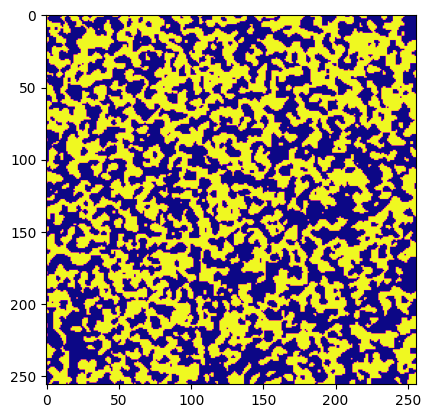

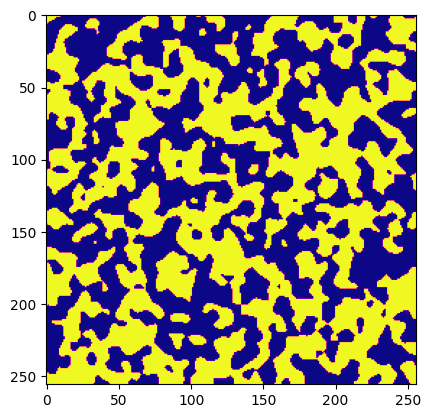

In [ ]:
### Matrix slicing BIN media (test)

kmap = np.load(cwd + '/medios_256Lcont/' + 'X_256L_bin_ics_test.npy')
keff =np.load(cwd + '/medios_256Lcont/' + 'Y_256L_bin_ics_test.npy')

kmap_lc4 = kmap[:5, :, :, :]
kmap_lc8 = kmap[5:256, :, :, :]

keff_lc4 = keff[:5, :]
keff_lc8 = keff[5:256, :]

print(kmap_lc4.shape)
print(kmap_lc8.shape)
print(keff_lc4.shape)
print(keff_lc8.shape)

plt.imshow(np.log(kmap_lc4)[0], cmap='plasma')
plt.show()
plt.imshow(np.log(kmap_lc8)[4], cmap='plasma')
plt.show()

In [14]:
### Save new numpy files
# Feature: kmap
np.save(f'X_256L_mg_hcs_var1_lc4.npy', kmap_lc4)
np.save(f'X_256L_mg_hcs_var1_lc8.npy', kmap_lc8)

# Response: keff
np.save(f'Y_256L_mg_hcs_var1_lc4.npy', keff_lc4)
np.save(f'Y_256L_mg_hcs_var1_lc8.npy', keff_lc8)

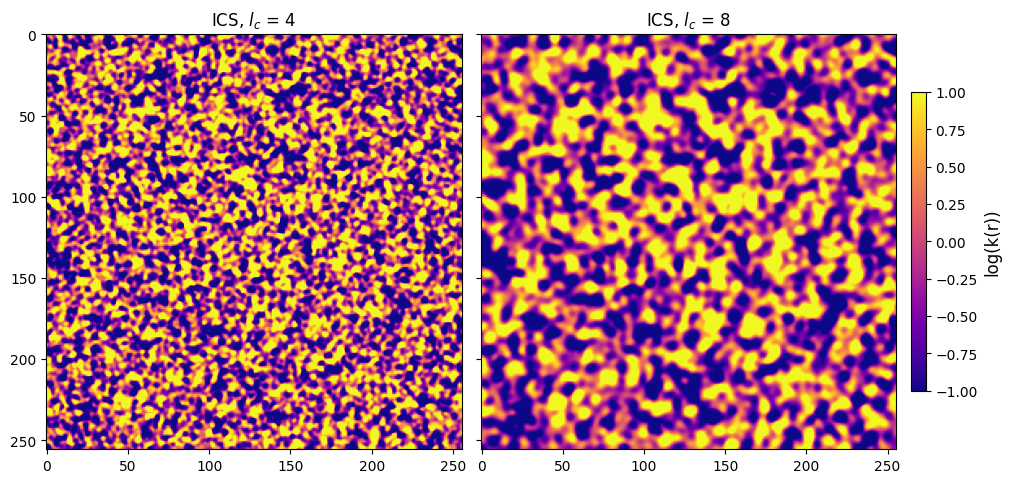

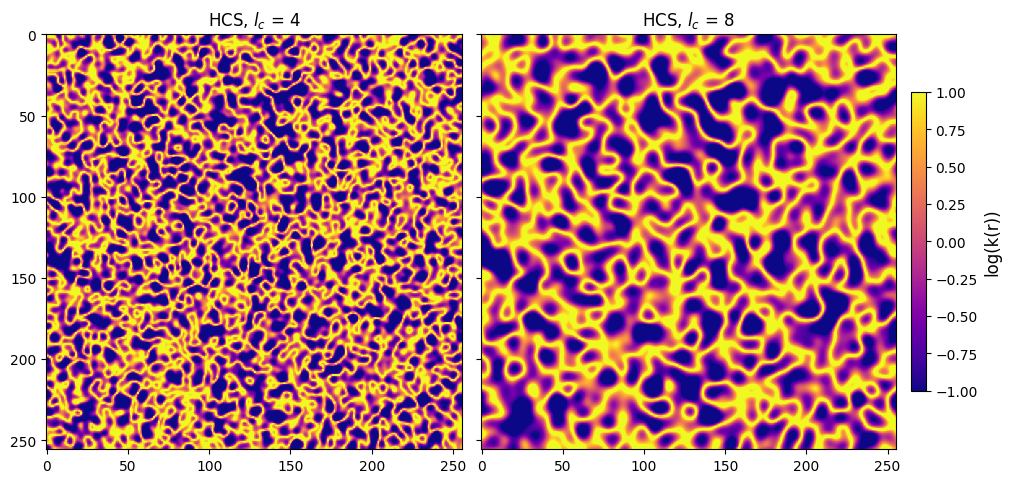

In [83]:
# Maps visualization of log(k(r))
ec_label1 = ['ics', 'hcs']

kmap_sample = 65

v = 1
cmap = 'plasma'

for ic in range(len(ec_label1)):
    fig, ax = plt.subplots(1, 2, figsize=(10, 20), layout='constrained', sharey=True)
    for ilc in range(len(lc)):
        kmap = np.load(cwd + '/medios_256Lcont/X_256L_mg_' + ec_label1[ic] + '_var1_lc' + str(lc[ilc]) + '.npy')[kmap_sample]
        im = ax[ilc].imshow(np.log(kmap), cmap=cmap, vmin=-v, vmax=v)
        ax[ilc].set_title(ec_label2[ic]+', '+r'$l_{c}$'+' = '+str(lc[ilc]), fontsize=12)
    cb = fig.colorbar(im, shrink=0.15, orientation='vertical', pad=0.025)
    cb.set_label(label='log(k(r))', fontsize=12)
    plt.show()
    plt.close()




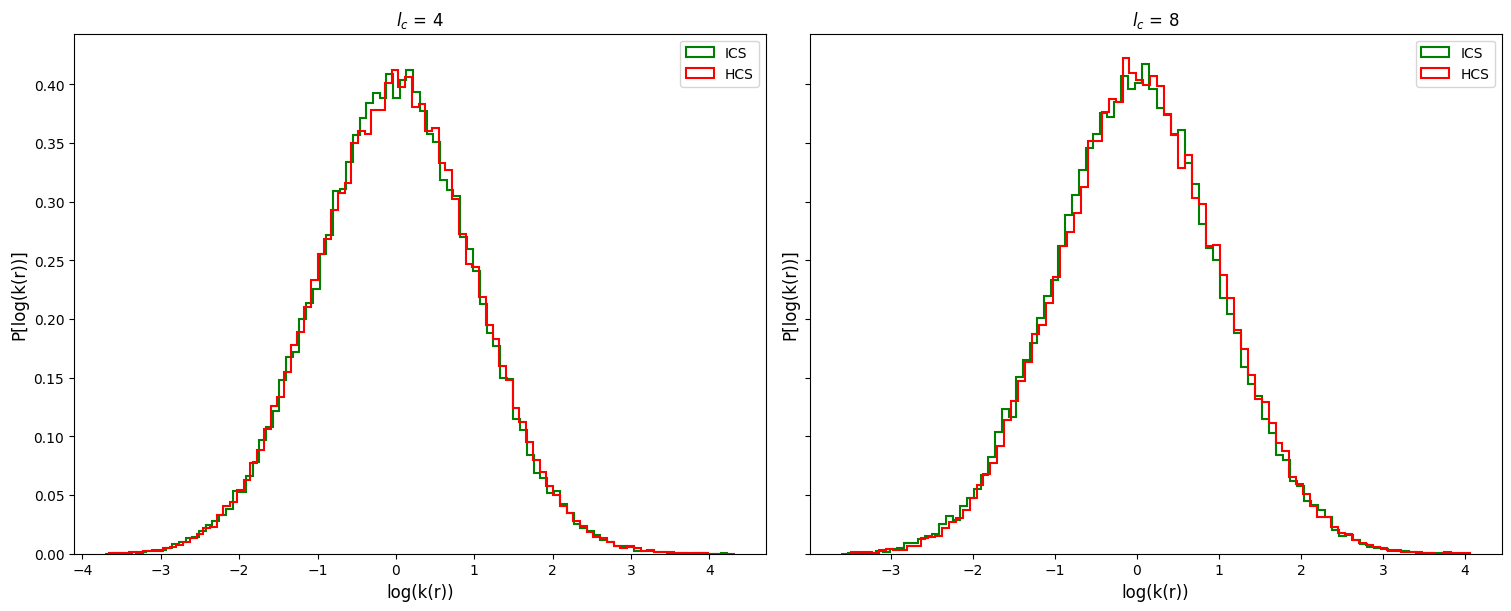

In [82]:
### Probability density funtion (PDF) of log(k(r))

color = ['g', 'r']

kmap_sample = 125

fig, ax = plt.subplots(1, 2, figsize=(15, 6), layout='constrained', sharey=True)
for ilc in range(len(lc)):
    for ic in range(len(ec_label1)):
        kmap = np.load(cwd + '/medios_256Lcont/X_256L_mg_' + ec_label1[ic] + '_var1_lc' + str(lc[ilc]) + '.npy')[kmap_sample]
        kmap = kmap.reshape(-1)
        ax[ilc].hist(np.log(kmap), bins='scott', density=True, histtype='step', color=color[ic], lw=1.5, label=ec_label2[ic])
        ax[ilc].set_xlabel('log(k(r))', fontsize=12)
        ax[ilc].set_ylabel('P[log(k(r))]', fontsize=12)

        ax[ilc].legend()
        ax[ilc].set_title(r'$l_{c}$'+' = '+str(lc[ilc]), fontsize=12)
plt.show()
plt.close()

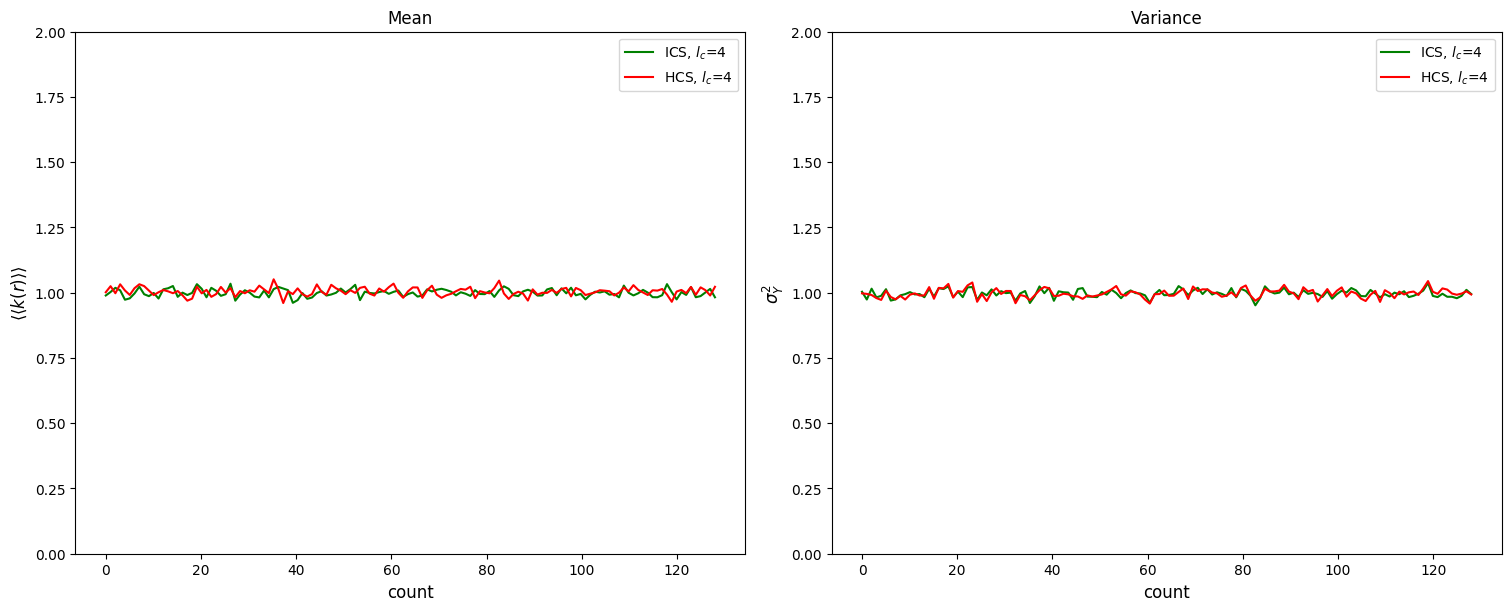

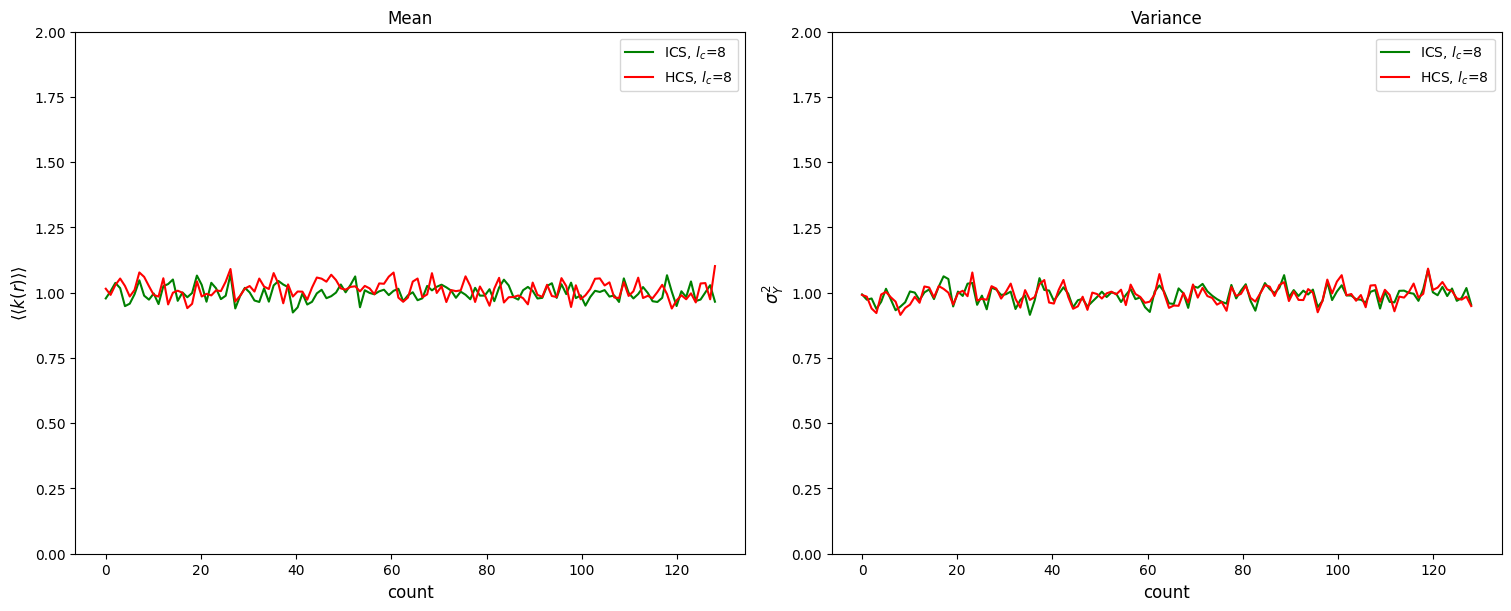

In [ ]:
### Variance and mean plots

x_sim = np.linspace(0, 128, 128)
title = ['Mean', 'Variance']

for ilc in range(len(lc)):
    fig, ax = plt.subplots(1, 2, figsize=(15,6), layout='constrained', sharey=False)
    for ic in range(len(ec_label1)):
        var = np.array([])
        mean = np.array([])
        kmap = np.load(cwd + '/medios_256Lcont/X_256L_mg_' + ec_label1[ic] + '_var1_lc' + str(lc[ilc]) + '.npy')
        
        for ireal in range(realizations):
            var = np.append(var, np.var(np.log(kmap[ireal])))
            mean = np.append(mean, np.exp(np.mean(np.log(kmap[ireal]))))
        

        ax[0].plot(x_sim, mean, label=ec_label2[ic] + ', ' + r'$l_{c}$' + '=' + str(lc[ilc]), color=color[ic])
        ax[0].legend(loc='best', fontsize=10)
        ax[0].set_xlabel('count', fontsize=12)
        ax[0].set_ylabel(r'$⟨⟨k(r)⟩⟩$', fontsize=12)
        ax[0].set_ylim(0,2)
        ax[0].set_title(title[0])
        
      
        
        
        ax[1].plot(x_sim, var, label=ec_label2[ic] + ', ' + r'$l_{c}$' + '=' + str(lc[ilc]), color=color[ic])
        ax[1].legend(loc='best', fontsize=10)
        ax[1].set_xlabel('count', fontsize=12)
        ax[1].set_ylabel(r'$\sigma^2_{Y}$', fontsize=12)
        ax[1].set_ylim(0,2)
        ax[1].set_title(title[1])
    plt.show()
    plt.close()